In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdata
import matplotlib.pyplot as plt
import datetime, urllib3,json

%matplotlib inline 

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)





#symbol =sorted(['AA','AAL'])
#print(symbol)
#stockprice = pdata.get_data_yahoo(symbol, "2017-1-1", "2018-1-30")

#stockprice

In [2]:
XLF=['BAC','WFC','C','USB','GS','AXP',
'BRK.B','JPM',
'CME','MS',
'PNC',
'CB','SCHW','BLK',
'SPGI',
'BK',
'ICE',
'COF',
'MMC','MET','PGR',
'PRU',
'AIG',
'BBT',
'AON','TRV',
'AFL',
'ALL',
'STI',
'STT',
'MCO',
'DFS',
'TROW',
'MTB',
'NTRS',
'SYF',
'KEY',
'RF',
'WLTW',
'AMP',
'FITB',
'CFG',
'HIG',
'HBAN',
'CMA',
'AJG',
'LNC',
'L',
'ETFC',
'MSCI',
'SIVB',
'PFG',
'CBOE',
'CINF',
'RJF',
'NDAQ',
'BEN',
'ZION',
'IVZ',
'RE',
'TMK',
'UNM',
'AMG',
'JEF',
'PBCT',
'AIZ',
'BHF',]

In [3]:
def get_etf_constituents(etf_tickers):
    res={}
    
    http = urllib3.PoolManager()
    for etf in etf_tickers:
        stock_tickers=[]
        
        if etf=="XLF":
            stock_tickers = XLF
        
        else :
        
            r = http.request('GET', 'https://core-api.barchart.com/v1/EtfConstituents?'+
            'composite=%s&'%etf+
            'fields=symbol,symbolName,percent,sharesHeld,symbolCodes,symbolType,lastPrice,dailyLastPrice&'+
            'orderBy=percent&orderDir=desc&meta=field.shortName,field.type,field.description&page=1&'+
            'limit=100&'+
            'raw=1')
            print(json.loads(r.data.decode('utf-8')))
            datas = json.loads(r.data.decode('utf-8'))['data']



            for data in datas:
                if (data['symbol'] != 'Unassigned') and \
                    (data['symbol'] != '') and (data['symbol'] != etf):
                    stock_tickers.append(data['symbol'])
                
                
      
        res[etf]=stock_tickers
    #print(res)
    return res

etfs=['XLF','XLE','XLI','XLB','XLP','XLY','XTL','XLK','XLV','XLU','XLRE']

In [6]:
import datetime
symbol_fin = sorted([
                "AMG","AFL","ALL","AXP","AIG","AMP","AON","AJG","AIZ",
                 "BAC","BK","BBT","BRK.B","BLK","HRB","BHF",
                 "COF","CBOE","SCHW","CB","CINF","C","CFG","CME","CMA",
                 "DFS","ETFC","RE","FITB","BEN","GS","HIG","HBAN",
                 "ICE","IVZ","JPM","KEY",
                 "LUK","LNC","L","MTB","MMC","MET","MCO","MS",
                 "NDAQ","NAVI","NTRS","PBCT","PNC","PFG","PGR","PRU",
                 "RJF","RF","SPGI","STT","STI","SYF","TROW","TMK","TRV",
                 "USB","UNM","WFC","WLTW","XL","ZION"])

symbol_tech = sorted(['AAPL','MSFT','FB','GOOG','GOOGL','INTC','V',
                'T','CSCO','VZ','MA','NVDA','ORCL','IBM','ADBE',
                'TXN','AVGO','ACN','PYPL','QCOM','CRM','MU','AMAT',
                'ATVI','ADP','CTSH','INTU','EA','EBAY','HPQ','LRCX','TEL',
                'ADI','FIS','ADSK','FISV','DXC','WDC','HPE','RHT','APH',
                'GLW','MCHP','PAYX','XLNX','SWKS','GPN','KLAC','MSI',
                'NTAP','STX','CTL','SYMC','TSS','ANSS','AKAM','CTXS',
                'SNPS','TTWO','IT','ADS','CA','VRSN','CDNS','FFIV',
                'QRVO','IPGP','JNPR','WU','AMD','FLIR','CSRA','XRX'])


symbol_energy= [u'SLB',u'COP',u'EOG',u'OXY',u'VLO',u'PSX',
  u'HAL',u'XOM',u'MPC',u'APC',u'PXD',u'KMI',u'CVX',u'OKE',
  u'WMB',u'CXO',u'DVN', u'ANDV', u'APA',u'NBL',u'MRO', u'HES',u'NOV',u'FTI',
  u'BHGE',u'EQT',u'COG',u'XEC', u'HP',u'NFX',u'RRC']


window=120

end_date=datetime.date.today().strftime("%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')
start_date = (end_dt-datetime.timedelta(days=(window*2))).strftime("%Y-%m-%d")


stockprice=None

etfs= ['XLF','XLE','XLI','XLB','XLP','XLY','XTL','XLK','XLV','XLU','XLRE']
etfs=['XLF']
symbol=[]
for etf in etfs:
    tmp = get_etf_constituents([etf])
    #print(tmp)
    symbol.extend(tmp[etf])
    

#stockprice = pdata.get_data_yahoo(symbol, start_date, end_date)
stockprice = pdata.get_data_yahoo(XLF, start_date, end_date)

[*********************100%***********************]  67 of 67 downloaded


In [ ]:
tmp = pdata.get_data_yahoo([u'UDR', u'HCP', u'AIV'], start_date, end_date)
print( " tmp ", tmp)

In [33]:
symbol =[u'UDR', u'HCP', u'AIV', u'EQIX', u'VNO', u'EQR', u'O', u'MAA', u'DLR', u'MAC', u'VTR', u'IRM', u'KIM', u'FRT', u'DRE', u'REG', u'AVB', u'GGP',
         u'CTSH', u'WDC', u'GOOGL', u'ANSS', u'GPN', u'AMAT', u'FISV', u'NVDA', u'MSI', u'FLIR', u'TSS', u'MSFT', u'CRM', u'TXN', u'TEL', u'CDNS', u'ADSK', u'ATVI', u'CTXS', u'GLW', u'HPQ', u'LRCX', u'GOOG', u'FIS', u'AKAM', u'PYPL', u'CA', u'EA', u'ACN', u'INTU', u'V', u'PAYX', u'XLNX', u'STX', u'HPE', u'ADI', u'VRSN', u'MA', u'NTAP', u'CSCO', u'EBAY', u'MU', u'APH', u'JNPR', u'MCHP', u'DXC', u'KLAC',
         u'SWK', u'RTN', u'LUV', u'AAL', u'WM', u'DE', u'CAT', u'EMR', u'FDX', u'COL', u'PCAR', u'RHI', u'MMM', u'ROK', u'DAL', u'NSC', u'AME', u'AOS', u'UAL', u'ROP', u'PH', u'TXT', u'EXPD', u'EFX', u'FTV', u'HON', u'URI', u'JEC', u'UTX', u'UPS', u'INFO', u'MAS', u'PWR', u'VRSK', u'RSG', u'NOC', u'ARNC', u'ITW', u'FBHS', u'XYL',
         u'AXP', u'USB', u'WFC', u'CME', u'CBOE', u'CMA', u'BK', u'BAC', u'COF', u'ZION', u'TMK', u'SCHW', u'LUK', u'HBAN', u'AMG', u'PRU', u'RF', u'CB', u'AMP', u'NTRS', u'LNC', u'C', u'GS', u'KEY', u'FITB', u'HIG', u'STI', u'ICE', u'STT', u'SIVB', u'DFS', u'BLK', u'BHF', u'MTB', u'BBT', u'TROW', u'UNM', u'AJG', u'MCO', u'JPM', u'SYF', u'PFG', u'CFG', u'PBCT', u'RJF', u'MS', u'SPGI', u'PNC', u'IVZ', u'MET',
         u'COP', u'EOG', u'HP', u'KMI', u'MRO', u'WMB', u'FTI', u'HAL', u'SLB', u'PXD',
         u'NUE', u'AVY', u'SHW', u'MOS', u'PX', u'ALB', u'CF', u'WRK', u'FCX', u'IFF', u'PKG', u'LYB', u'SEE', u'FMC', u'APD',
         u'NFLX', u'AZO', u'DRI', u'RCL', u'CHTR', u'DISH', u'HBI', u'GM', u'HD', u'LKQ', u'NWS', u'NWSA', u'DLTR', u'UAA', u'DIS', u'EXPE', u'HOG', u'GT', u'DHI', u'DISCK', u'FOX', u'GPC', u'KMX', u'APTV', u'BBY', u'AMZN', u'GPS', u'TSCO', u'MAR', u'FOXA', u'NCLH', u'HLT', u'LEN', u'ROST', u'DISCA', u'UA', u'CMCSA',
         u'AET', u'DVA', u'AMGN', u'ESRX', u'VAR', u'CAH', u'TMO', u'LLY', u'HUM', u'LH', u'ISRG', u'VRTX', u'MYL', u'RMD', u'DGX', u'PKI', u'MDT', u'HSIC', u'A', u'ABC', u'DHR', u'ANTM', u'ABT', u'BAX', u'MRK', u'UNH', u'EW', u'WAT', u'BDX', u'ZTS', u'MCK', u'SYK', u'IDXX', u'ALGN', u'JNJ',
         u'WEC', u'AEP', u'DUK', u'EIX', u'EXC', u'NI', u'XEL', u'ED', u'DTE', u'ETR', u'AEE', u'PNW', u'LNT', u'PEG', u'CMS', u'PCG', u'ES',
         u'CBB', u'INFN', u'SATS', u'PANW', u'CIEN', u'VSAT', u'GSAT', u'WIFI', u'CSCO', u'COMM', u'MSI', u'LITE',
         u'GIS', u'KMB', u'PEP', u'MO', u'WBA', u'KO', u'CVS', u'CLX', u'PG', u'SJM', u'KHC', u'CAG'
         ]
stockprice = pdata.get_data_yahoo(symbol, "2017-9-1", "2018-4-3")

[*********************100%***********************]  293 of 293 downloaded


In [7]:
print(stockprice.shape)
df= stockprice["Close"]
print (len(df.columns))
#list(df)

df.head(5)

(167, 396)
66


,AFL,AIG,AIZ,AJG,ALL,AMG,AMP,AON,AXP,BAC,...,STT,SYF,TMK,TROW,TRV,UNM,USB,WFC,WLTW,ZION
2019-01-07,45.160000,40.410000,90.809998,72.110001,82.540001,102.550003,111.239998,144.229996,98.169998,25.559999,...,64.989998,25.370001,77.959999,91.849998,118.300003,31.430000,46.610001,47.639999,151.610001,42.790001
2019-01-08,45.299999,40.570000,90.919998,72.430000,82.529999,102.370003,111.940002,144.919998,98.650002,25.510000,...,65.269997,25.420000,78.860001,92.320000,117.839996,31.610001,46.910000,47.540001,152.580002,43.180000
2019-01-09,45.200001,41.160000,91.480003,73.279999,83.160004,103.500000,113.099998,145.130005,98.830002,25.760000,...,66.779999,25.990000,79.709999,92.650002,118.680000,32.299999,47.410000,47.799999,151.660004,43.549999
2019-01-10,45.770000,41.419998,92.500000,73.690002,83.540001,104.070000,113.440002,147.630005,98.260002,25.730000,...,66.510002,25.750000,79.820000,92.290001,120.269997,32.200001,47.310001,47.750000,153.350006,43.759998
2019-01-11,45.689999,41.660000,92.580002,72.699997,83.449997,102.110001,113.440002,147.250000,98.550003,26.030001,...,67.010002,26.020000,80.080002,90.250000,120.470001,32.369999,47.439999,47.869999,153.990005,43.990002


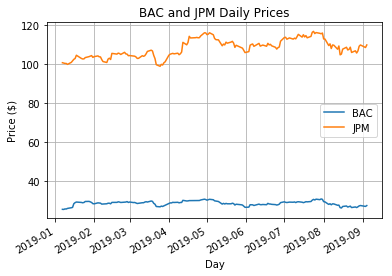

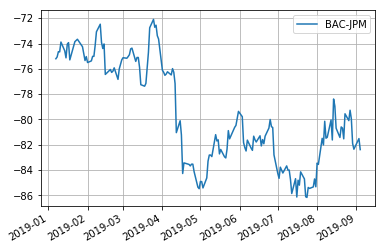

In [33]:
#ts1 = df[ list(df)[0]]
#ts2= df[list(df)[1]]
ts1 = df[ "BAC"]
ts2= df["JPM"]


def plot_price_series(df, ts1, ts2):
    #months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, ts1, label=ts1.name)
    ax.plot(df.index, ts2, label=ts2.name)
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Day')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1.name, ts2.name))
    plt.legend()
    plt.show()
    
plot_price_series(df,ts1,ts2)


fig, ax = plt.subplots()
ax.plot(ts1.index, ts1-ts2,label=ts1.name+"-"+ts2.name) 
ax.grid(True)
fig.autofmt_xdate()
plt.legend()
plt.show()

In [12]:
# check NaN
#df.drop('BHF', axis=1, inplace=True)
#df.drop('BRK.B', axis=1, inplace=True)

df_2 = df.isnull().sum()

#print (type(df_2))

#print( df.isnull().sum())




df_1 = np.log(df) - np.log(df.shift(1))

df_1 = df_1.iloc[1:]

#print(df_1.isnull().sum())

#df_1.iloc[0:20,0:10]

AFL      0
AIG      0
AIZ      0
AJG      0
ALL      0
AMG      0
AMP      0
AON      0
AXP      0
BAC      0
BBT      0
BEN      0
BHF      0
BK       0
BLK      0
C        0
CB       0
CBOE     0
CFG      0
CINF     0
CMA      0
CME      0
COF      0
DFS      0
ETFC     0
FITB     0
GS       0
HBAN     0
HIG      0
ICE      0
        ..
MCO      0
MET      0
MMC      0
MS       0
MSCI     0
MTB      0
NDAQ     0
NTRS     0
PBCT     0
PFG      0
PGR      0
PNC      0
PRU      0
RE       0
RF       0
RJF      0
SCHW     0
SIVB     0
SPGI     0
STI      0
STT      0
SYF      0
TMK     14
TROW     0
TRV      0
UNM      0
USB      0
WFC      0
WLTW     0
ZION     0
Length: 66, dtype: int64


,AFL,AIG,AIZ,AJG,ALL,AMG,AMP,AON,AXP,BAC
2019-01-08,0.003095,0.003952,0.001211,0.004428,-0.000121,-0.001757,0.006273,0.004773,0.004878,-0.001958
2019-01-09,-0.002210,0.014438,0.006140,0.011667,0.007605,0.010978,0.010309,0.001448,0.001823,0.009752
2019-01-10,0.012532,0.006297,0.011088,0.005579,0.004559,0.005492,0.003002,0.017079,-0.005784,-0.001165
2019-01-11,-0.001749,0.005778,0.000865,-0.013526,-0.001078,-0.019013,0.000000,-0.002577,0.002947,0.011592
2019-01-14,0.005239,0.008128,0.010957,-0.000550,0.004185,0.002445,0.005275,0.002442,-0.001117,0.012977
2019-01-15,0.010181,0.010657,0.009569,0.003435,0.005118,0.015510,0.009947,0.013926,-0.004582,0.006803
2019-01-16,0.008797,0.015892,-0.000953,0.011048,0.003674,0.030224,0.026389,0.008714,0.014387,0.069118
2019-01-17,0.010836,0.003703,0.010955,0.002574,0.000355,-0.000840,0.002787,0.009951,0.000804,0.018803
2019-01-18,0.007998,0.019898,0.009696,0.006742,0.013273,0.014006,0.021027,0.012447,0.009902,0.010637
2019-01-22,-0.006520,-0.018282,-0.014317,-0.013939,0.001865,-0.018499,-0.015226,-0.004609,-0.006490,-0.007193


stock size  66
0 14
coin_test AIG and BK  (-3.908426145865999, 0.009657014138829715, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.8459765665651151
OLS:  const    103.194102
BK        -1.137465
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIG-(1*-1.137464977922789)*BK


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


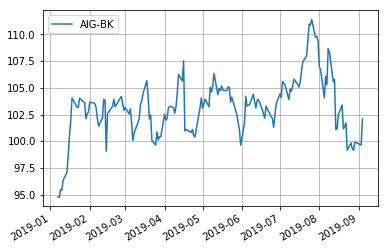

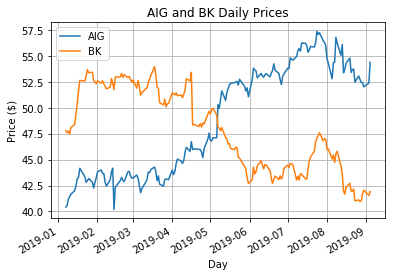

0 14
0 14
0 14
coin_test ALL and AON  (-4.544966267972793, 0.0010320578855302766, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9606195472436736
OLS:  const    25.726349
AON       0.399379
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=ALL-(1*0.3993786924300916)*AON


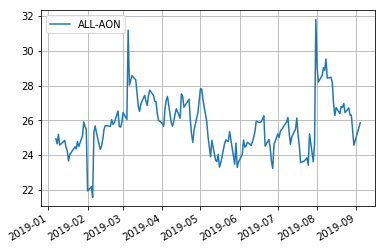

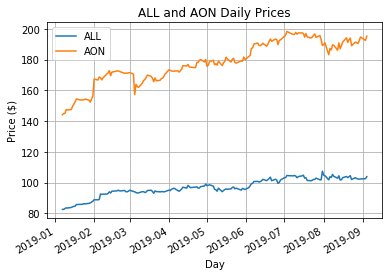

coin_test ALL and MMC  (-4.067517603035821, 0.005739891933801844, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.941933072241043
OLS:  const    1.512641
MMC      1.009532
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=ALL-(1*1.0095318417826953)*MMC


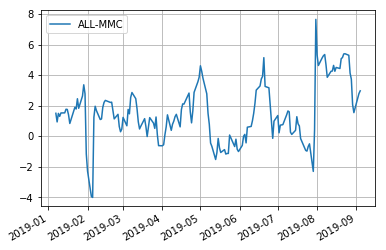

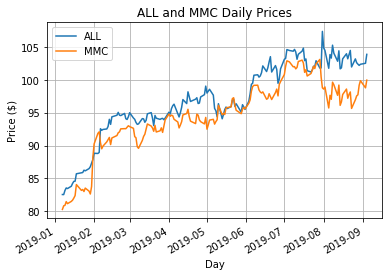

0 14
coin_test ALL and WLTW  (-5.75540472070419, 5.3682291095048835e-06, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9735946464378497
OLS:  const    16.515096
WLTW      0.446513
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=ALL-(1*0.4465131112845234)*WLTW


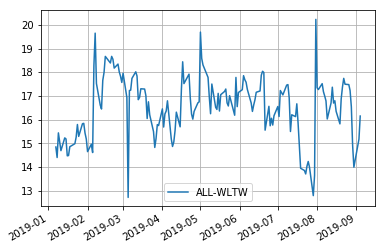

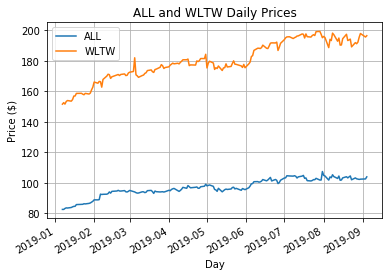

0 14
0 14
coin_test AON and BK  (-4.040277585343723, 0.006286487776780284, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.7496648693197548
OLS:  const    304.615290
BK        -2.643941
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AON-(1*-2.6439412947123615)*BK


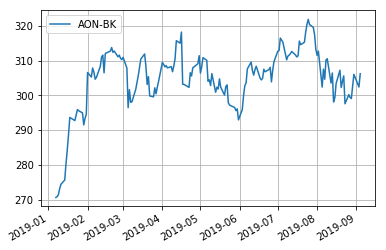

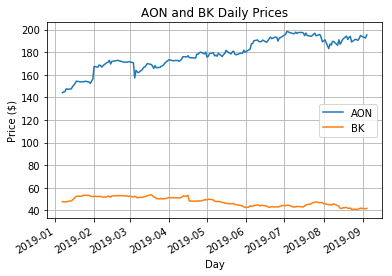

0 14
0 14
0 14
coin_test BBT and CFG  (-5.434767678515967, 2.4199072607733604e-05, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9529476944910933
OLS:  const    10.48402
CFG       1.10410
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*1.1040997478815515)*CFG


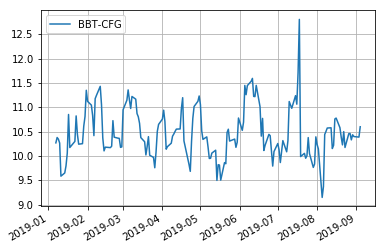

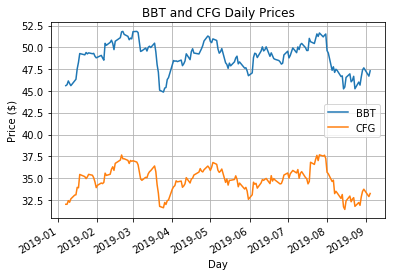

coin_test BBT and HBAN  (-4.476521825030253, 0.0013381005620757157, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9560061773552484
OLS:  const    5.745405
HBAN     3.206767
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*3.2067668858328533)*HBAN


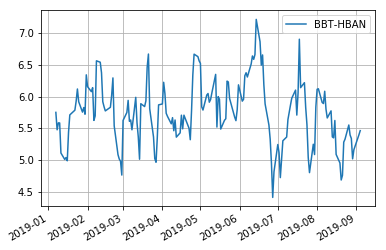

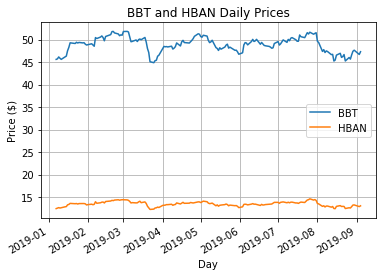

0 14
0 14
coin_test BHF and PBCT  (-3.9068234651597016, 0.009706436628426051, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.7808364709824084
OLS:  const    4.500256
PBCT     2.026762
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BHF-(1*2.026761841578499)*PBCT


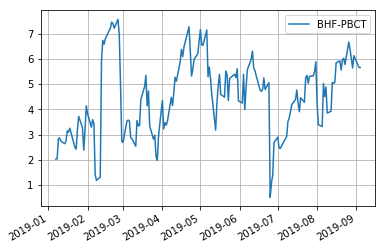

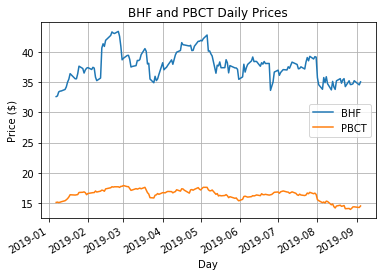

0 14
coin_test BHF and ZION  (-4.001508378192791, 0.007145825236104325, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.7308992500063822
OLS:  const    10.689502
ZION      0.587463
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BHF-(1*0.5874626848903713)*ZION


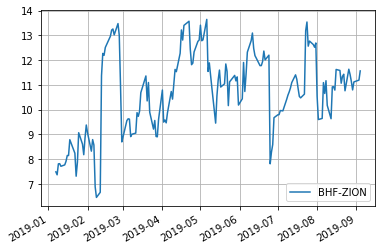

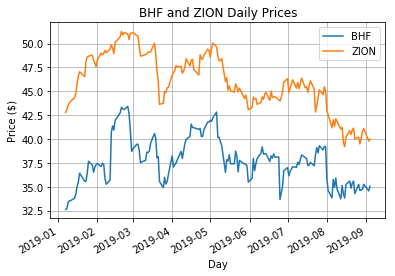

coin_test BK and CB  (-4.670817336161446, 0.0006329058657591228, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.854087778423508
OLS:  const    104.035836
CB        -0.393455
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BK-(1*-0.39345493847717283)*CB


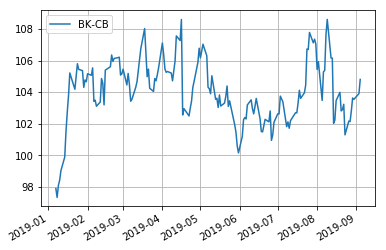

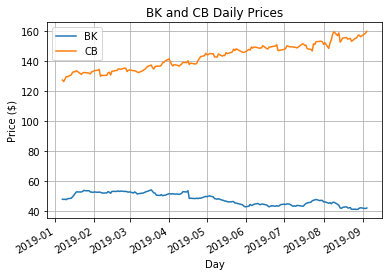

coin_test BK and CINF  (-4.263373559366459, 0.002918232547503868, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.8679723960944561
OLS:  const    77.046637
CINF     -0.308217
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BK-(1*-0.3082172410301981)*CINF


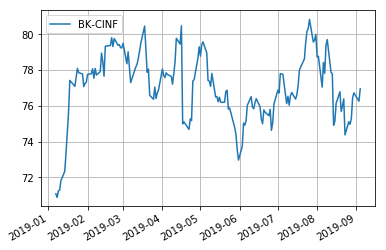

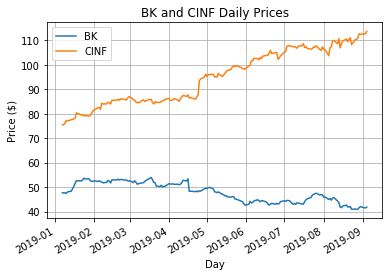

0 14
0 14
coin_test C and PNC  (-4.246164260105892, 0.0031017787953358782, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9183317700472117
OLS:  const   -4.054395
PNC      0.535783
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=C-(1*0.5357833014454162)*PNC


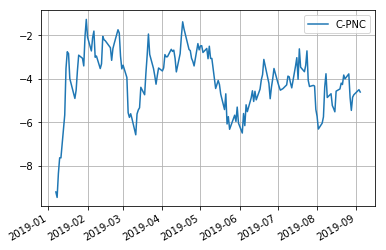

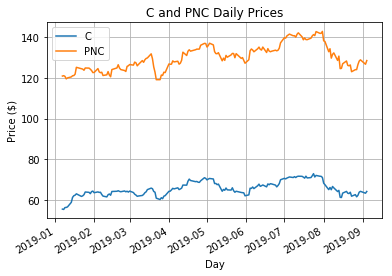

coin_test C and SYF  (-4.744410799439935, 0.00047230618391403344, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.7941349602616707
OLS:  const    27.800692
SYF       1.151037
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=C-(1*1.1510368139898715)*SYF


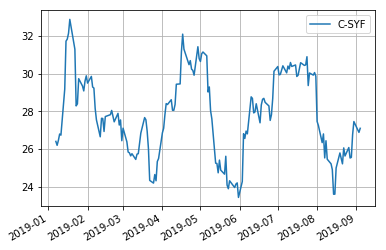

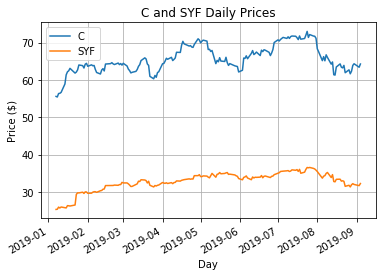

0 14
coin_test CB and CMA  (-4.338869635899399, 0.00222531644795005, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.8288642663976531
OLS:  const    215.924266
CMA       -0.981742
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CB-(1*-0.981742245431567)*CMA


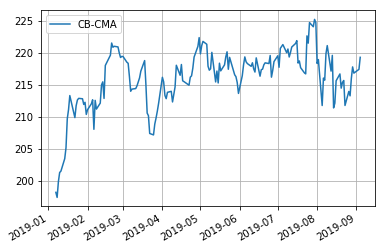

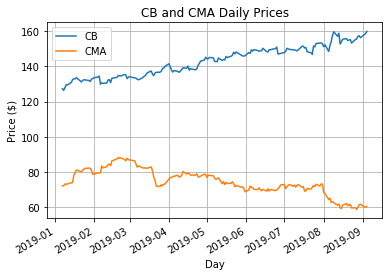

coin_test CB and STT  (-4.754674970808893, 0.0004532371954826115, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.9104531235161766
OLS:  const    208.630922
STT       -1.051326
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CB-(1*-1.0513256940216982)*STT


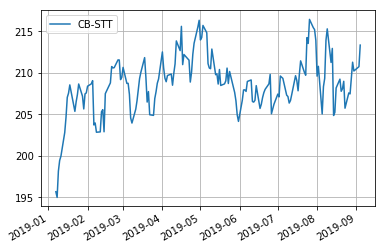

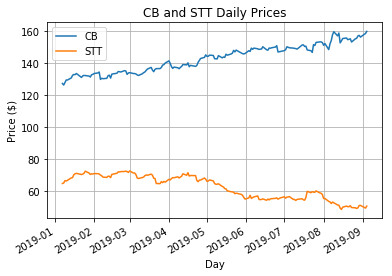

0 14
coin_test CBOE and HIG  (-4.024454295477103, 0.006625235015485638, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9452544379934714
OLS:  const    0.082914
HIG      1.979954
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CBOE-(1*1.9799538517604893)*HIG


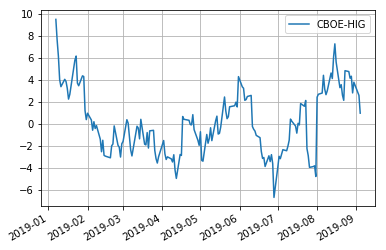

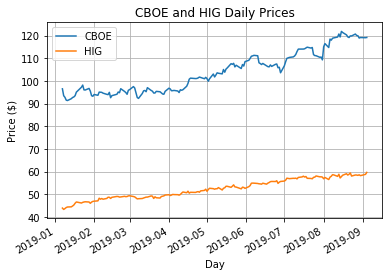

0 14
coin_test CFG and HBAN  (-4.74163843248322, 0.00047758520903448773, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9523455537298641
OLS:  const   -2.311487
HBAN     2.757160
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CFG-(1*2.757160215684417)*HBAN


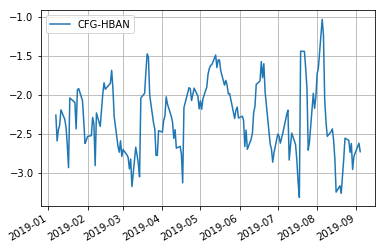

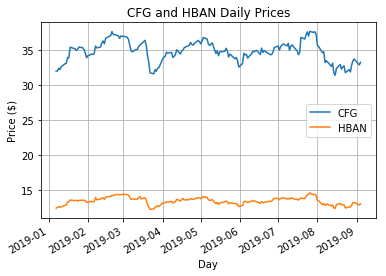

0 14
coin_test CINF and STT  (-4.205343455034574, 0.0035803939598391785, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.9175251510690713
OLS:  const    180.789508
STT       -1.374482
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CINF-(1*-1.374482278279116)*STT


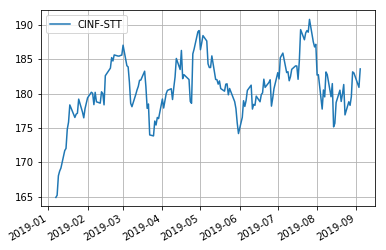

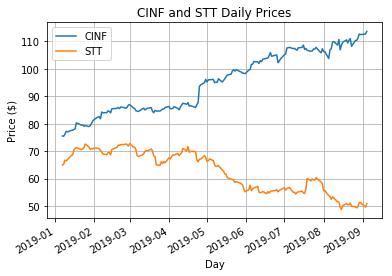

0 14
0 14
coin_test CMA and ZION  (-4.1745394318785465, 0.00398542031654389, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9602689753795416
OLS:  const   -30.981133
ZION      2.293260
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CMA-(1*2.293259974025952)*ZION


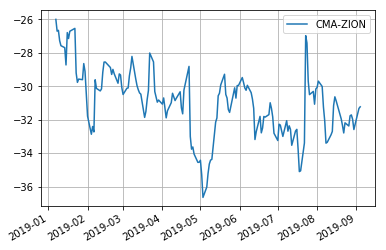

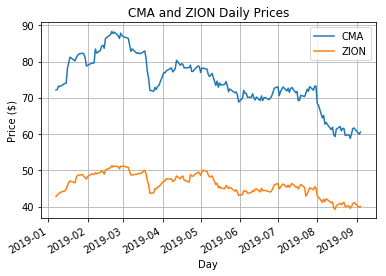

0 14
coin_test COF and PFG  (-4.1097310619927265, 0.004977647527308969, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.9115461018626344
OLS:  const    22.377125
PFG       1.198358
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=COF-(1*1.1983581023043892)*PFG


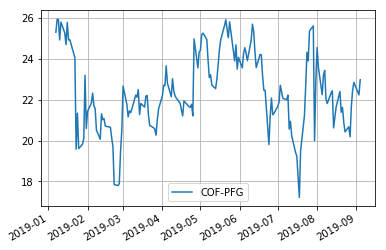

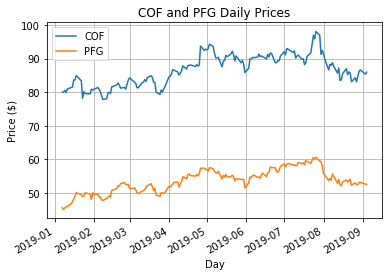

0 14
0 14
0 14
coin_test FITB and IVZ  (-4.088843590717258, 0.0053424755241044085, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.5870606136925313
OLS:  const    19.709945
IVZ       0.385547
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=FITB-(1*0.3855467260595603)*IVZ


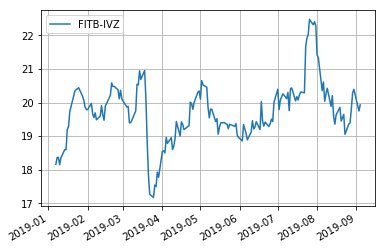

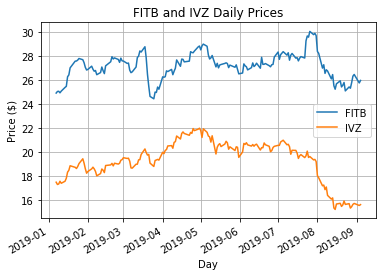

coin_test FITB and JEF  (-3.943336382158169, 0.008634902451931457, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.623399729256843
OLS:  const    14.129497
JEF       0.664042
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=FITB-(1*0.6640419394754289)*JEF


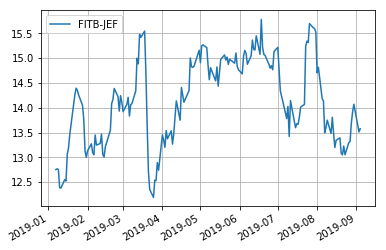

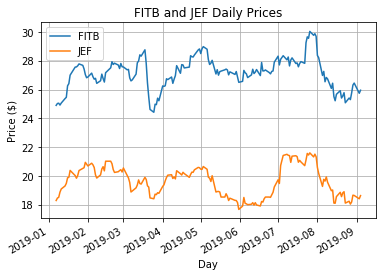

coin_test FITB and L  (-3.9964596982170746, 0.0072652114929550315, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.536691329306514
OLS:  const    16.765269
L         0.207278
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=FITB-(1*0.20727808426188613)*L


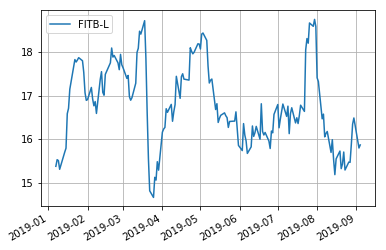

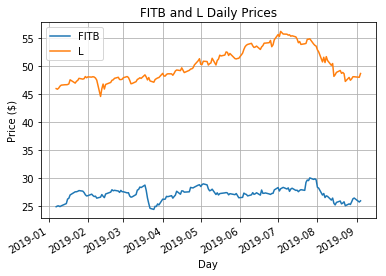

0 14
0 14
0 14
coin_test HIG and STT  (-4.194221100262615, 0.0037220683522823797, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.8857063060615115
OLS:  const    84.638854
STT      -0.515259
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=HIG-(1*-0.5152588237976059)*STT


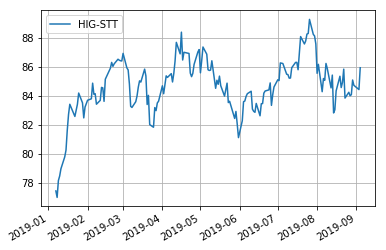

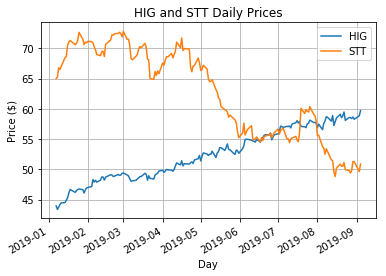

0 14
0 14
0 14
0 14
0 14
0 14
coin_test L and MET  (-3.9346996772286973, 0.008878298616772418, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.944836825584511
OLS:  const   -5.175728
MET      1.194035
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=L-(1*1.1940348044120372)*MET


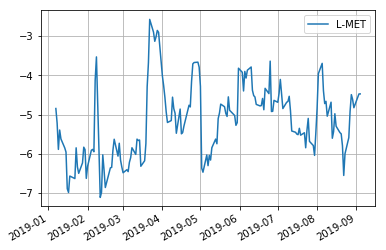

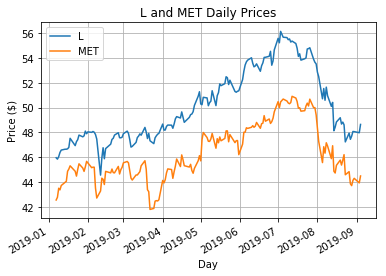

0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
coin_test PFG and PNC  (-4.208054201539105, 0.0035466229745527776, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.93165431992682
OLS:  const   -14.891788
PNC       0.526641
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=PFG-(1*0.526641035545573)*PNC


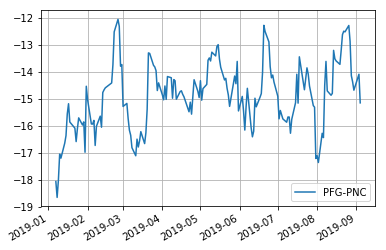

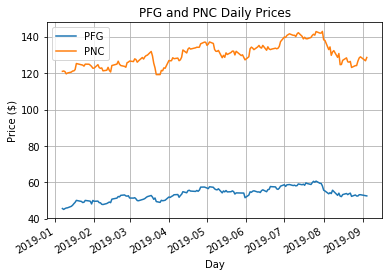

0 14
0 14
0 14
0 14
0 14
0 14
0 14
coin_test SCHW and SPGI  (-4.16594875970473, 0.00410562732222881, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  -0.7932917802435036
OLS:  const    66.475123
SPGI     -0.106921
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=SCHW-(1*-0.10692097400930875)*SPGI


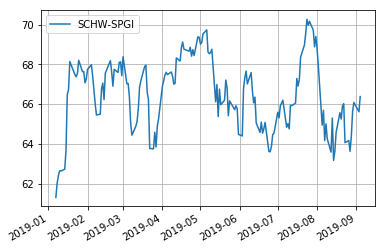

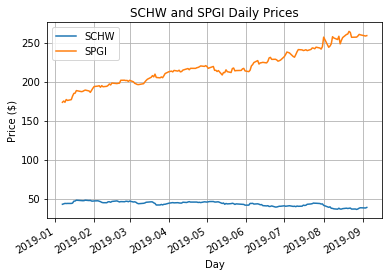

0 14
0 14
0 14
0 14
0 14
0 14
14 0
14 0
14 0
14 0
14 0
14 0
14 0
Signal count  27


In [32]:
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm
#result = ts.coint(ts1, ts2)

#print ("coin test - sig lvl 5%", result)


def coint_finder(all_stck_df):
    stck_size = len(all_stck_df.columns)
    print("stock size ",stck_size)
    pairs=[[]]
    signal_count =0
    for i in range (0,stck_size):
        for j in range (i+1, stck_size):
            ts1 = all_stck_df[ list(all_stck_df)[i]]
            ts2 = all_stck_df[ list(all_stck_df)[j]]
            
            if ts1.isnull().sum()> 0 or ts2.isnull().sum()>0:
                
                continue
            
            coin_test = ts.coint(ts1, ts2)
            
            #print("coin_test %s and %s "%(ts1.name, ts2.name),coin_test)
            if ( coin_test[1]< 0.01 ): #pvalue,  If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.
                
                
                print("coin_test %s and %s "%(ts1.name, ts2.name),coin_test)
                
            
                
                
                x=ts2
                y=ts1
                x=sm.add_constant(x)
                res = sm.OLS(y,x).fit()
                
                corr = np.corrcoef(ts1, ts2)
                print ("correlation ", corr[0][1])
                
                print("OLS: ", res.params)
                
                base_url= "https://www.tradingview.com/chart/?symbol="
                print("check chart: https://www.tradingview.com/chart/?symbol=%s-(1*%s)*%s"%(ts1.name,res.params[1],ts2.name))
                
                fig, ax = plt.subplots()
                ax.plot(ts1.index,ts1-res.params[1]*ts2,label=ts1.name+"-"+ts2.name) 
                ax.grid(True)
                fig.autofmt_xdate()
                plt.legend()
                plt.show()
                               
                plot_price_series(all_stck_df,ts1,ts2) 
                
                
                
                pairs.append([ts1.name, ts2.name])
                print("===============")
                
                signal_count+=1
            else:
                pass
    print("Signal count ", signal_count)

df_1 = np.log(df) - np.log(df.shift(1))

df_1 = df_1.iloc[1:]

#print(df_1)
coint_finder(df.iloc[:,:]) # use raw price to do cointergation and regression

coin_test BAC and JPM  (-2.280071118840717, 0.3835381358804385, array([-3.96363199, -3.37318544, -3.07009811]))
correlation  0.96082984842811
OLS:  const    12.653635
JPM       0.147579
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BAC-(1*0.14757862014718634)*JPM


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


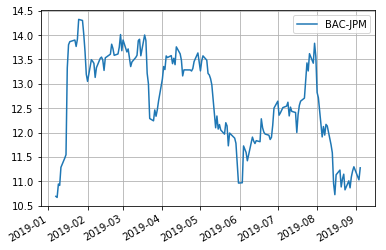

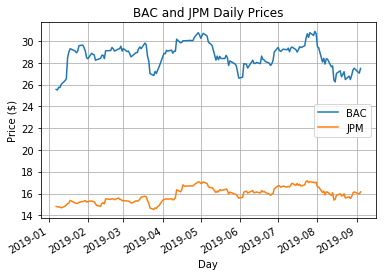

In [42]:
ts1 = df[ 'BAC']
ts2 = df['JPM']
win=60


coin_test = ts.coint(ts1, ts2)

#print("coin_test %s and %s "%(ts1.name, ts2.name),coin_test)
#pvalue,  If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.

print("coin_test %s and %s "%(ts1.name, ts2.name),coin_test)


x=ts2
y=ts1
x=sm.add_constant(x)
res = sm.OLS(y,x).fit()

corr = np.corrcoef(ts1[-win:], ts2[-win:])
print ("correlation ", corr[0][1])

print("OLS: ", res.params)

base_url= "https://www.tradingview.com/chart/?symbol="
print("check chart: https://www.tradingview.com/chart/?symbol=%s-(1*%s)*%s"%(ts1.name,res.params[1],ts2.name))

fig, ax = plt.subplots()
ax.plot(ts1.index,ts1-res.params[1]*ts2,label=ts1.name+"-"+ts2.name) 
ax.grid(True)
fig.autofmt_xdate()
plt.legend()
plt.show()

plot_price_series(df,ts1,0.147*ts2) 

print("===============")